In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ramimahmed222115141","key":"4437740a67dda61046c4331fb725471f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d iamsouravbanerjee/software-professional-salaries-2022

Dataset URL: https://www.kaggle.com/datasets/iamsouravbanerjee/software-professional-salaries-2022
License(s): other
100% 526k/526k [00:00<00:00, 1.26MB/s]
100% 526k/526k [00:00<00:00, 1.26MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('software-professional-salaries-2022.zip', 'r') as zip_ref:
    zip_ref.extractall('data_folder')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv("/content/data_folder/Software_Professional_Salaries.csv")
df.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location
0,3.8,Sasken,Android Developer,400000,3,Bangalore
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore


In [ ]:
df.shape

(22774, 6)

In [ ]:
df.columns

Index(['Rating', 'Company Name', 'Job Title', 'Salary', 'Salaries Reported',
       'Location'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22774 entries, 0 to 22773
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22774 non-null  float64
 1   Company Name       22773 non-null  object 
 2   Job Title          22774 non-null  object 
 3   Salary             22774 non-null  int64  
 4   Salaries Reported  22774 non-null  int64  
 5   Location           22774 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,Rating,Salary,Salaries Reported
count,22774.000000,2.277400e+04,22774.000000
mean,3.918249,6.953606e+05,1.855625
std,0.519676,8.843263e+05,6.823078
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


In [ ]:
df.isnull().sum()

,0
Rating,0
Company Name,1
Job Title,0
Salary,0
Salaries Reported,0
Location,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df["Rating"].nunique()

41

In [ ]:
df["Company Name"].nunique()

11262

In [ ]:
df["Job Title"].nunique()

1084

In [ ]:
df["Salaries Reported"].nunique()

82

In [ ]:
df["Location"].unique()

array(['Bangalore', 'Chennai', 'Hyderabad', 'New Delhi', 'Pune', 'Jaipur',
       'Kerala', 'Kolkata', 'Madhya Pradesh', 'Mumbai'], dtype=object)

In [ ]:
print("Mean Salary:", round(df["Salary"].mean()))
print("Median Salary:", round(df["Salary"].median()))
print("Highest Salary:", round(df["Salary"].max()))
print("Lowest Salary:", round(df["Salary"].min()))

Mean Salary: 695361
Median Salary: 500000
Highest Salary: 90000000
Lowest Salary: 2112


In [ ]:
df["Salary"].sort_values()[:5]

,Salary
22567,2112
9939,8448
5465,12000
13988,12000
15079,12000


In [ ]:
df["Salary"].sort_values()[:5]

,Salary
22567,2112
9939,8448
5465,12000
13988,12000
15079,12000


In [ ]:
df["Location"].value_counts()

,count
Location,
Bangalore,8265
Hyderabad,4468
New Delhi,4176
Chennai,2458
Pune,2135
Mumbai,749
Kolkata,178
Madhya Pradesh,155
Kerala,108


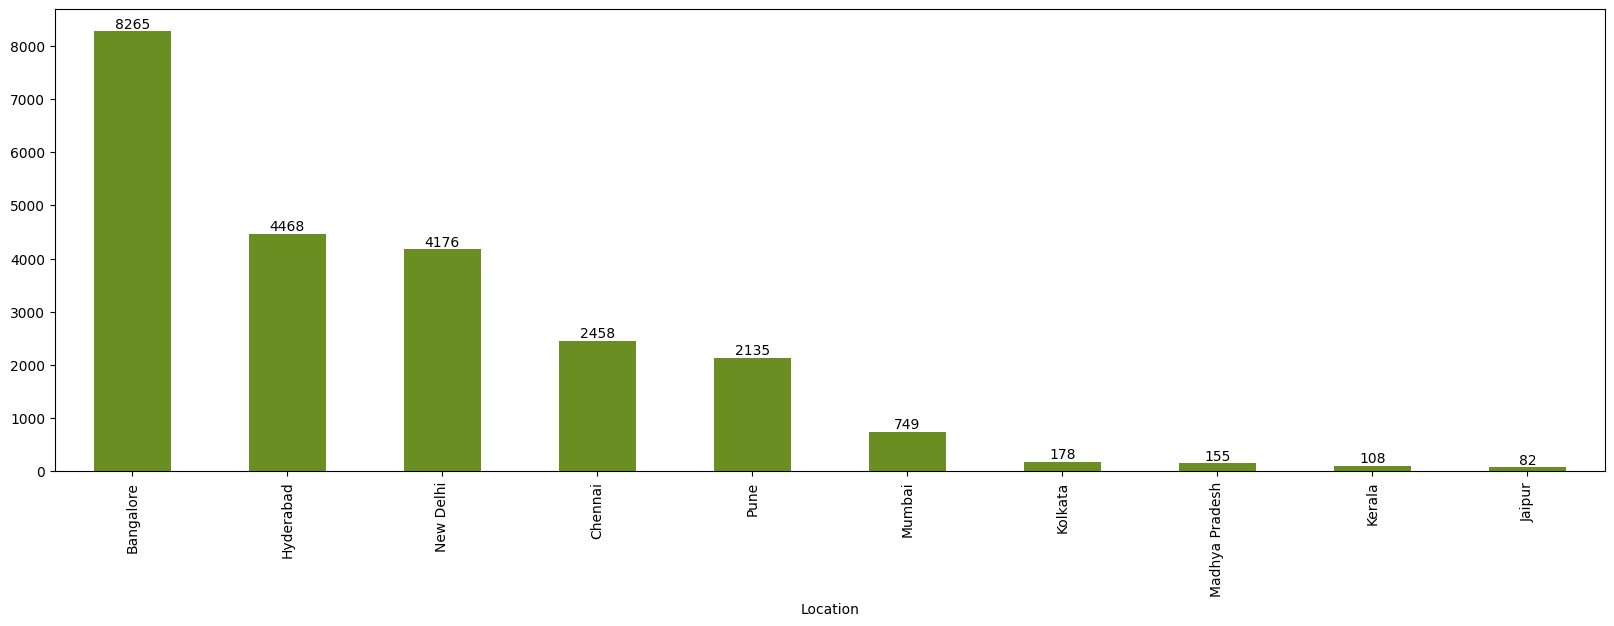

In [37]:
plt.figure(figsize=(20, 6))
ax = df.Location.value_counts().plot(kind='bar', color='olivedrab')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha='center', va='bottom', color='black')


<ipython-input-38-3e67a19e2751>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Salary"], y=df["Location"], palette="tab20");


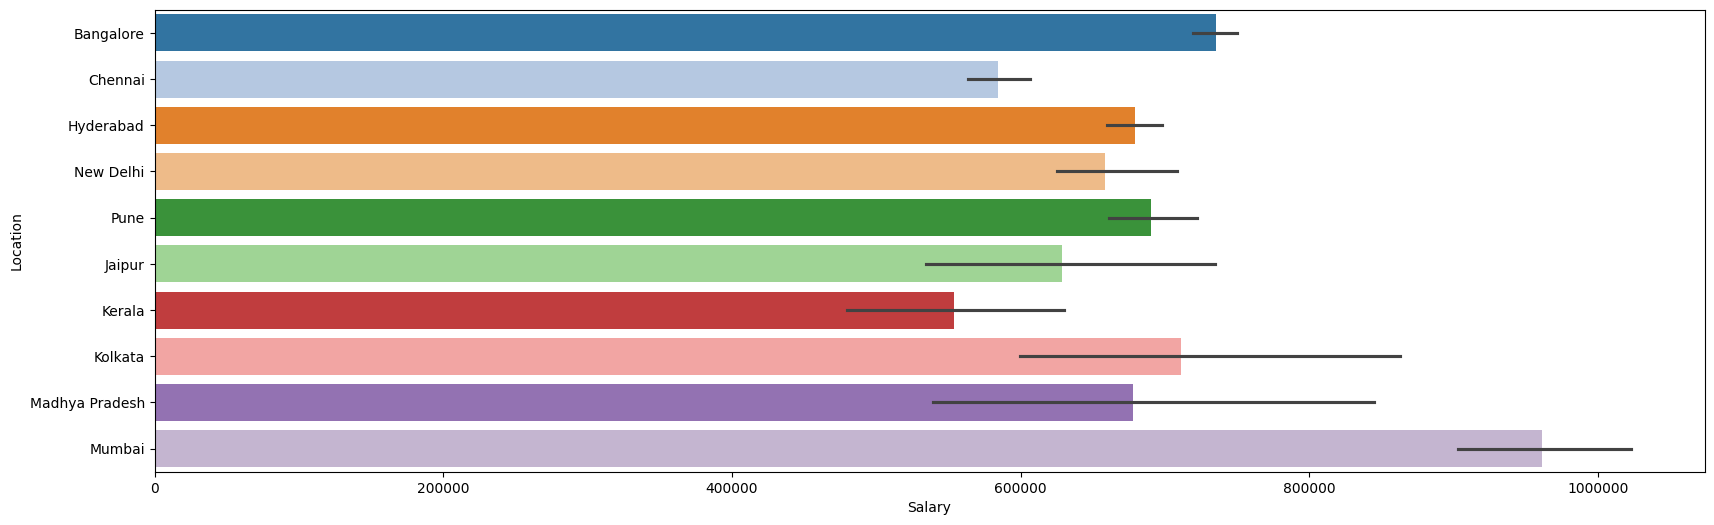

In [38]:
plt.figure(figsize=(20, 6))
plt.ticklabel_format(style='plain')
sns.barplot(x=df["Salary"], y=df["Location"], palette="tab20");


<ipython-input-39-90e6dc483069>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Company Name"][1:51], y=df["Salary"][1:51], palette="nipy_spectral");


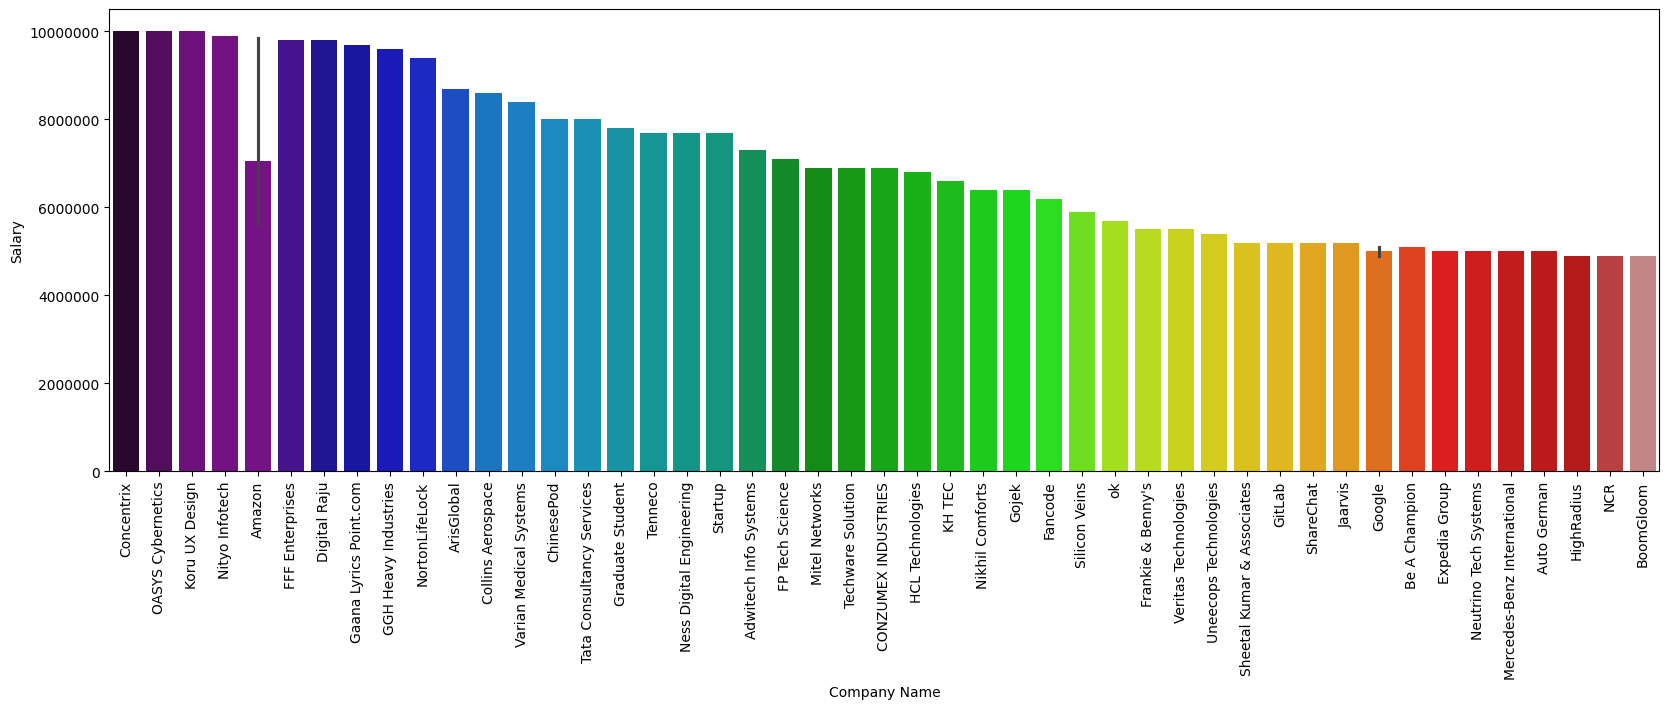

In [39]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain')
df.sort_values("Salary", axis=0, ascending=False, inplace=True)
sns.barplot(x=df["Company Name"][1:51], y=df["Salary"][1:51], palette="nipy_spectral");


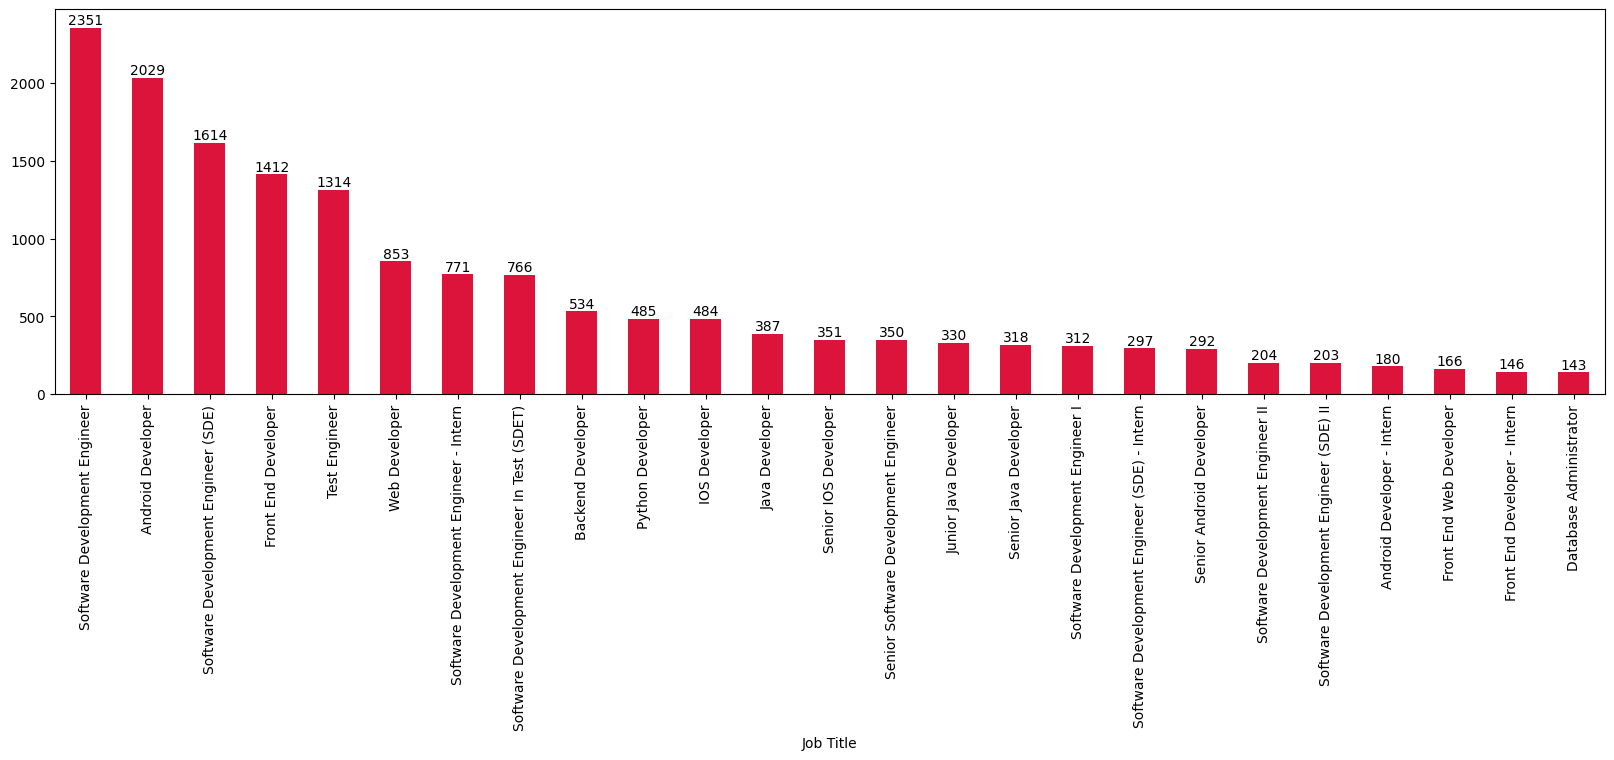

In [40]:
plt.figure(figsize=(20, 5))
ax = df["Job Title"].value_counts()[:25].plot(kind='bar', color="crimson")

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha='center', va='bottom', color='black')


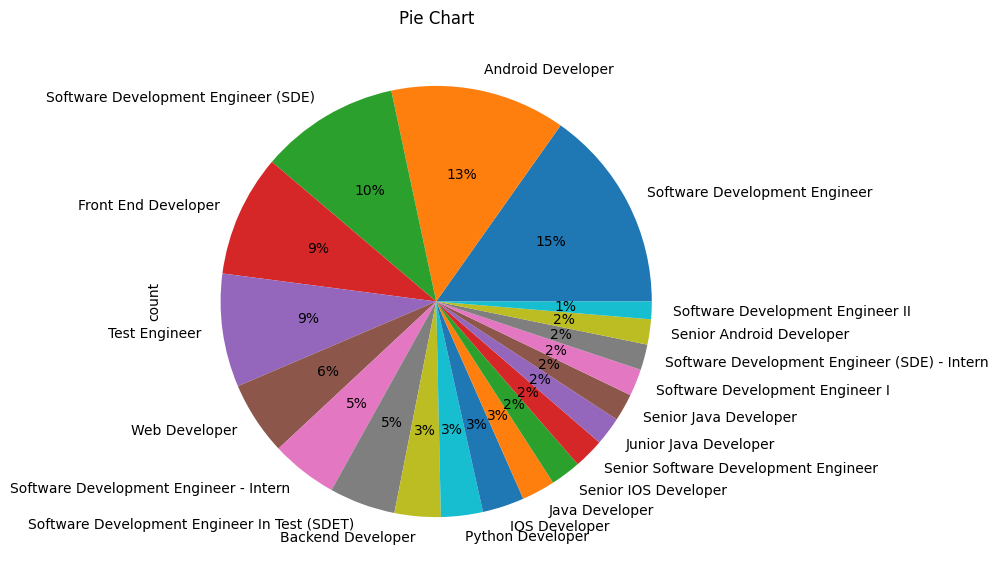

In [42]:
df["Job Title"].value_counts()[:20].plot.pie(figsize=(7, 7), autopct='%1.0f%%')
plt.title("Pie Chart")
plt.xticks(rotation=90)
plt.show()


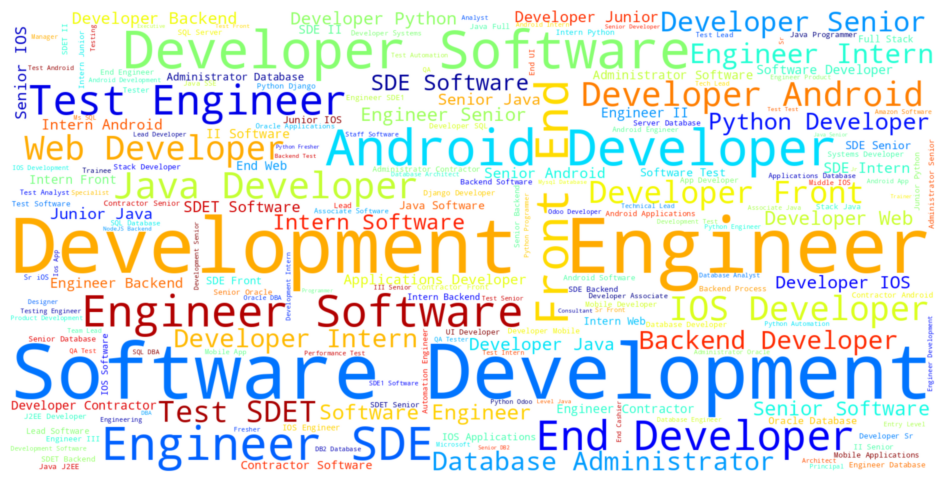

In [46]:
!pip install wordcloud
from wordcloud import WordCloud

text = " ".join(Job for Job in df["Job Title"])
word_cloud = WordCloud(width=1600, height=800, colormap='jet', background_color="white").generate(text)
plt.figure(figsize=(30, 6))
plt.imshow(word_cloud, interpolation="gaussian")
plt.axis("off")
plt.show()

<ipython-input-45-28ec4e9da4f2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Job Title"][:100], y=df["Salary"], palette="autumn");


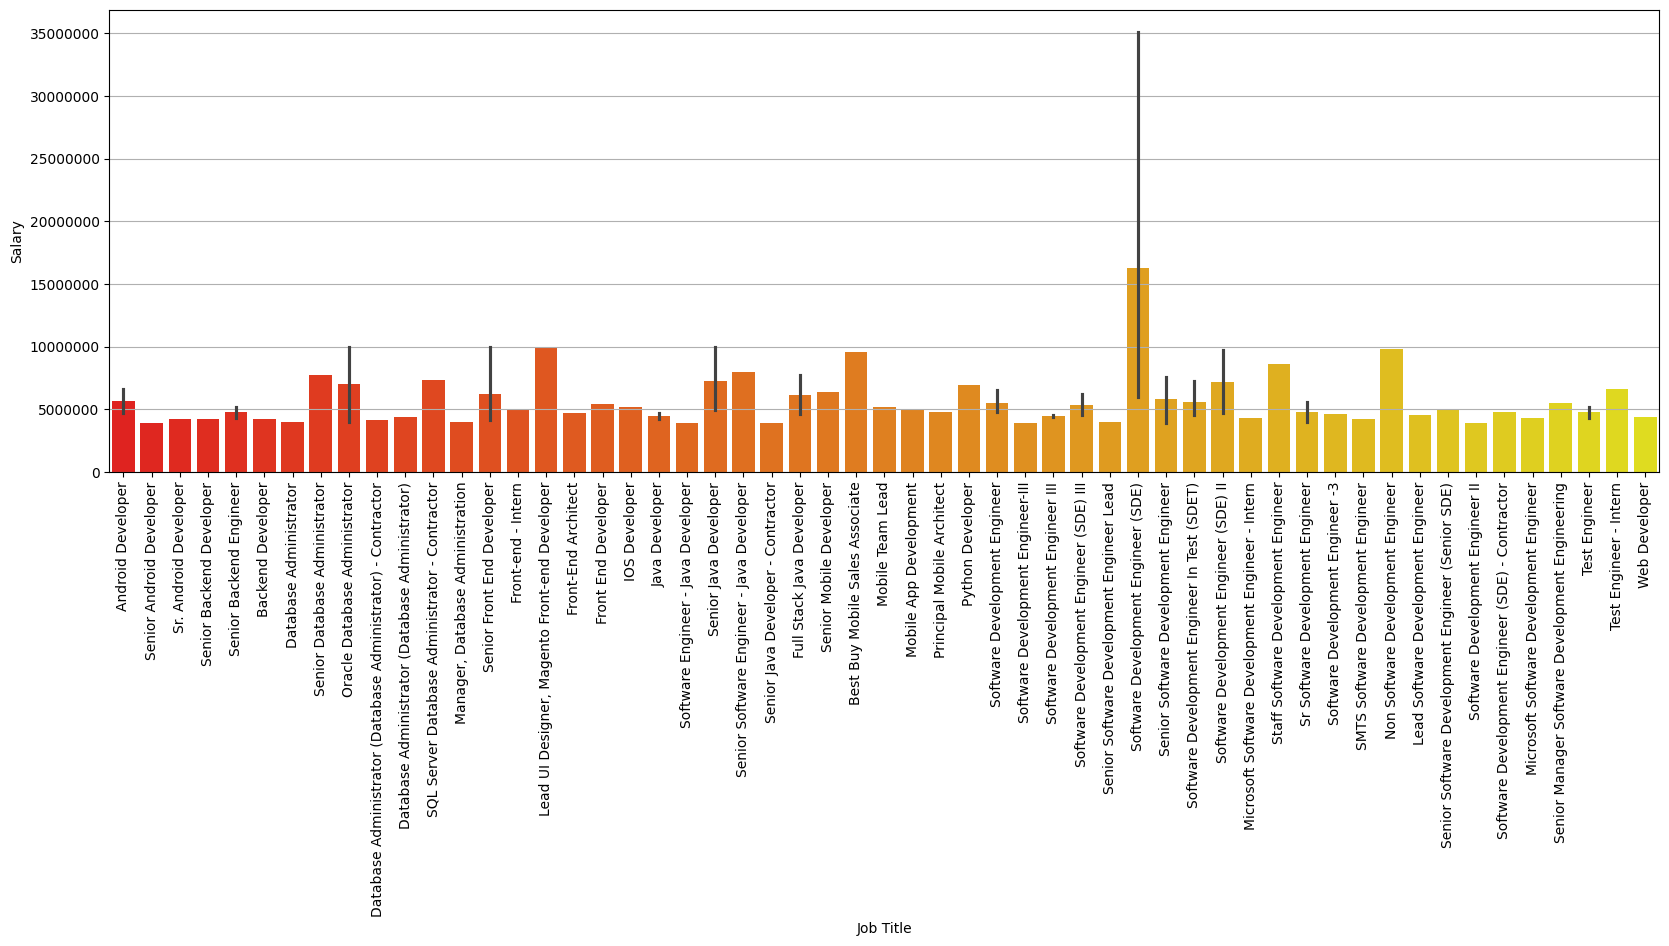

In [45]:
plt.figure(figsize=(20, 6))
plt.grid()
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain')
df.sort_values("Salary", axis=0, ascending=False, inplace=True)
sns.barplot(x=df["Job Title"][:100], y=df["Salary"], palette="autumn");


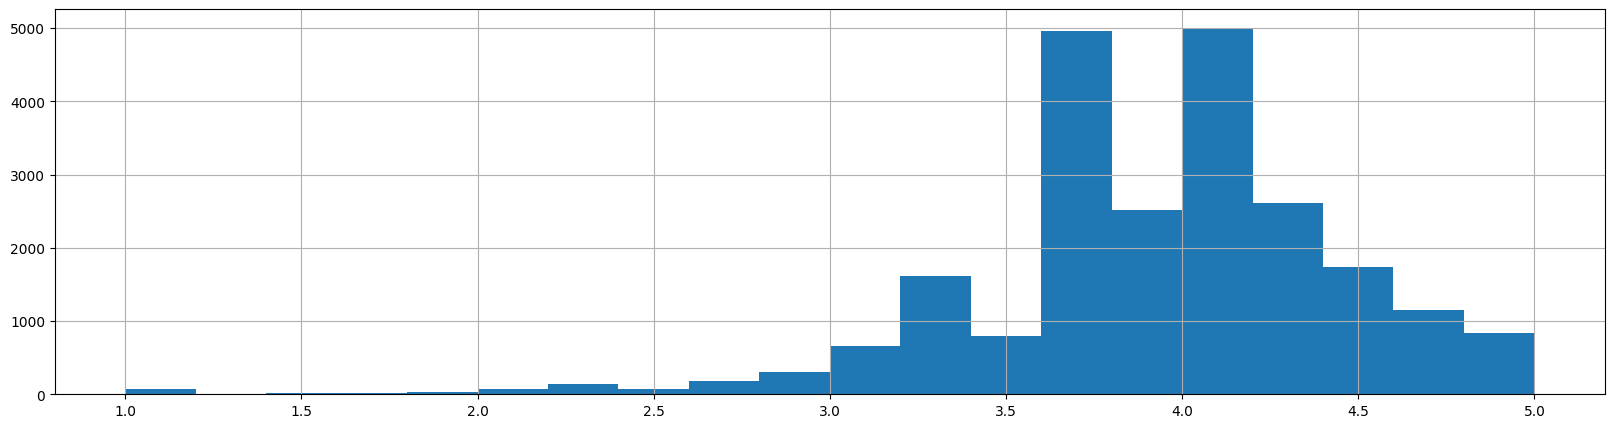

In [47]:
n_bins = 20
plt.figure(figsize=(20, 5))
df["Rating"].hist(bins=n_bins);


<ipython-input-49-bf5d326fdcc7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Job Title"][:100], y=df["Salary"], palette="twilight_shifted_r");


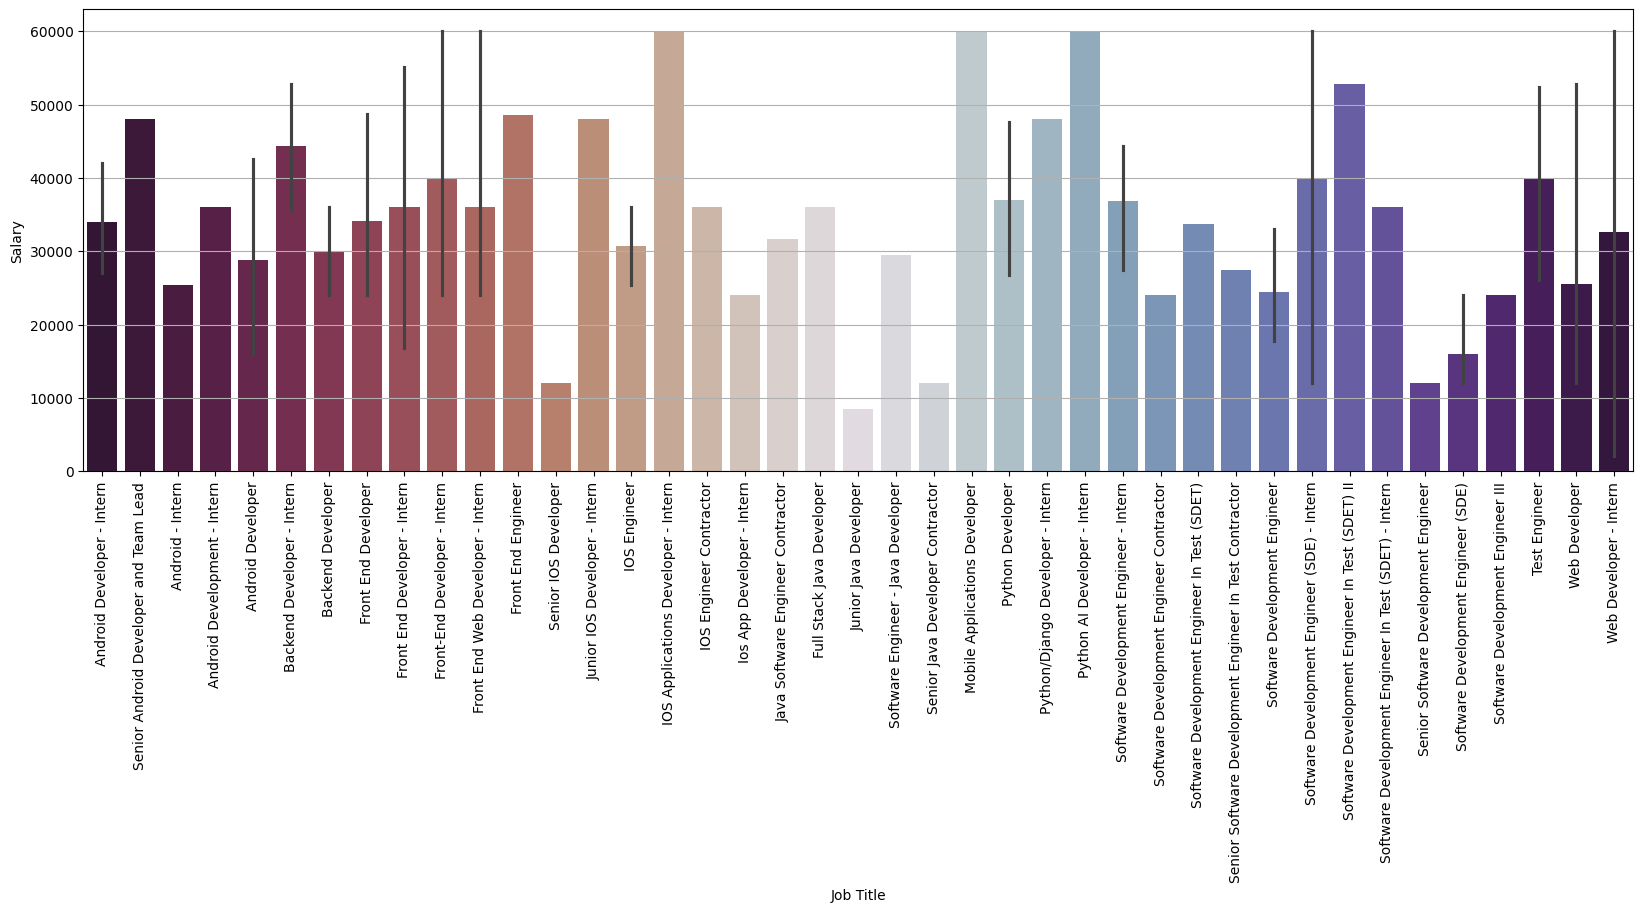

In [49]:
plt.figure(figsize=(20, 6))
plt.grid()
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain')
df.sort_values("Salary", axis=0, ascending=True, inplace=True)
sns.barplot(x=df["Job Title"][:100], y=df["Salary"], palette="twilight_shifted_r");


In [50]:
# Convert categorical features to numerical if needed
df_encoded = pd.get_dummies(df, drop_first=True)

# Define the target variable and features
X = df_encoded.drop('Salary', axis=1)  # Replace 'Salary' with your target column
y = df_encoded['Salary']  # Replace 'Salary' with your target column


In [51]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# Import the StandardScaler class from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)


In [ ]:
# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


In [ ]:
# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)


In [ ]:
# Predict on the test set
y_pred = linear_reg.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()
